## Here we are going to plot shots taken on a pitch

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from mplsoccer import Sbopen

We can sepcify an event (in this case ID 69301) to get different data out. The event data is stored in `df`.

Tactics dataframe provides information about player position on the pitch. ‘Related’ dataframe provides information on events that were related to each other - for example ball pass and pressure applied. df_freeze consists of freezed frames with player position in the moment of shots. 

In [17]:
parser = Sbopen()
df, related, freeze, tactics = parser.event(69301)
team1, team2 = df.team_name.unique()

# dataframe of the shots taken
shots = df.loc[df['type_name'] == 'Shot'].set_index('id')
shots

,index,period,timestamp,minute,second,possession,duration,match_id,type_id,type_name,...,dribble_overrun,block_deflection,bad_behaviour_card_id,bad_behaviour_card_name,pass_no_touch,block_save_block,foul_committed_advantage,foul_won_advantage,foul_committed_card_id,foul_committed_card_name
id,,,,,,,,,,,,,,,,,,,,,
a425a1dc-0ce2-415e-bf03-55c6b95e794a,340,1,00:10:24.396000,10,24,18,1.342346,69301,16,Shot,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29463e66-91b9-4d03-aae5-d40a35da078c,531,1,00:15:28.174000,15,28,25,0.472900,69301,16,Shot,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cf531f3a-9c18-49b8-8cfd-7d04806033db,720,1,00:21:08.216000,21,8,35,1.254112,69301,16,Shot,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4bb16d93-d6e4-4717-89b8-950b3dfbfa93,742,1,00:22:46.449000,22,46,37,1.118733,69301,16,Shot,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
820f6924-fa10-420d-81f7-f6a66d589edd,956,1,00:30:38.174000,30,38,52,1.359400,69301,16,Shot,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8a45dfd3-2310-48f6-89fe-8c5ae708a94a,1327,1,00:43:53.832000,43,53,75,1.828469,69301,16,Shot,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
daabd728-fbb8-4c01-abd1-6989b78bc00f,1485,1,00:48:48.810000,48,48,81,2.337809,69301,16,Shot,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
f736b03f-8586-4d14-8541-f291c034ef48,1577,1,00:50:54.516000,50,54,86,0.454200,69301,16,Shot,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4c2ba976-abfe-4968-891f-ff869407a670,1782,2,00:04:49.997000,49,49,100,0.515500,69301,16,Shot,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Drawing the pitch for our plots

Good information on this here: https://mplsoccer.readthedocs.io/en/latest/gallery/pitch_setup/plot_pitches.html

Different statistic sets use different coordinate systems. `Statsbomb` uses yards so we need to specify the right height and width.

The shot events have an x and y coordinate. To have the two teams on either side of the pitch, we need to subtract x and y for one of the teams from the pitch width and height.

We will plot each shot/goal as a circle.

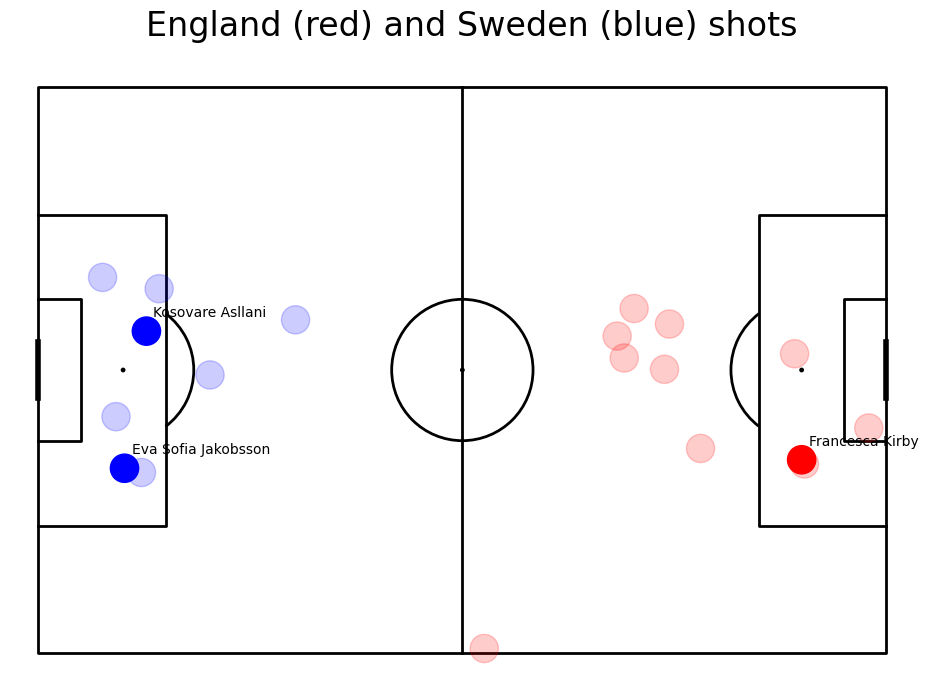

In [21]:
from mplsoccer import Pitch
import matplotlib.pyplot as plt

pitch = Pitch(line_color='black')
fig, ax = pitch.draw(figsize=(10, 7))
#Size of the pitch in yards (!!!)
pitchLengthX = 120
pitchWidthY = 80

# Loop through each shot and plot them:
for i,shot in shots.iterrows():
    x_coord = shot['x']
    y_coord = shot['y']
    goal = shot['outcome_name'] == 'Goal'
    team_name = shot['team_name']

    # set circle size
    circSize = 2

    #plot team1
    if (team_name == team1):
        if goal:
            shotCircle = plt.Circle((x_coord, y_coord), circSize, color='red')
            plt.text(x_coord+1, y_coord-2, shot['player_name'])
        else:
            shotCircle = plt.Circle((x_coord, y_coord), circSize, color='red')
            shotCircle.set_alpha(.2) # this parameter adjusts the transparency of the circle

    #plot team2
    if (team_name == team2):
        if goal:
            shotCircle = plt.Circle((pitchLengthX-x_coord, pitchWidthY-y_coord), circSize, color='blue')
            plt.text(pitchLengthX - x_coord + 1, pitchWidthY - y_coord - 2, shot['player_name'])
        else:
            shotCircle = plt.Circle((pitchLengthX-x_coord, pitchWidthY-y_coord), circSize, color='blue')
            shotCircle.set_alpha(.2) # this parameter adjusts the transparency of the circle
    
    ax.add_patch(shotCircle)
#set title
fig.suptitle("England (red) and Sweden (blue) shots", fontsize = 24)
fig.set_size_inches(10, 7)
plt.show()

## Plotting shots on one half

We can also just plot shots on one half of the pitch, using VerticalPitch.

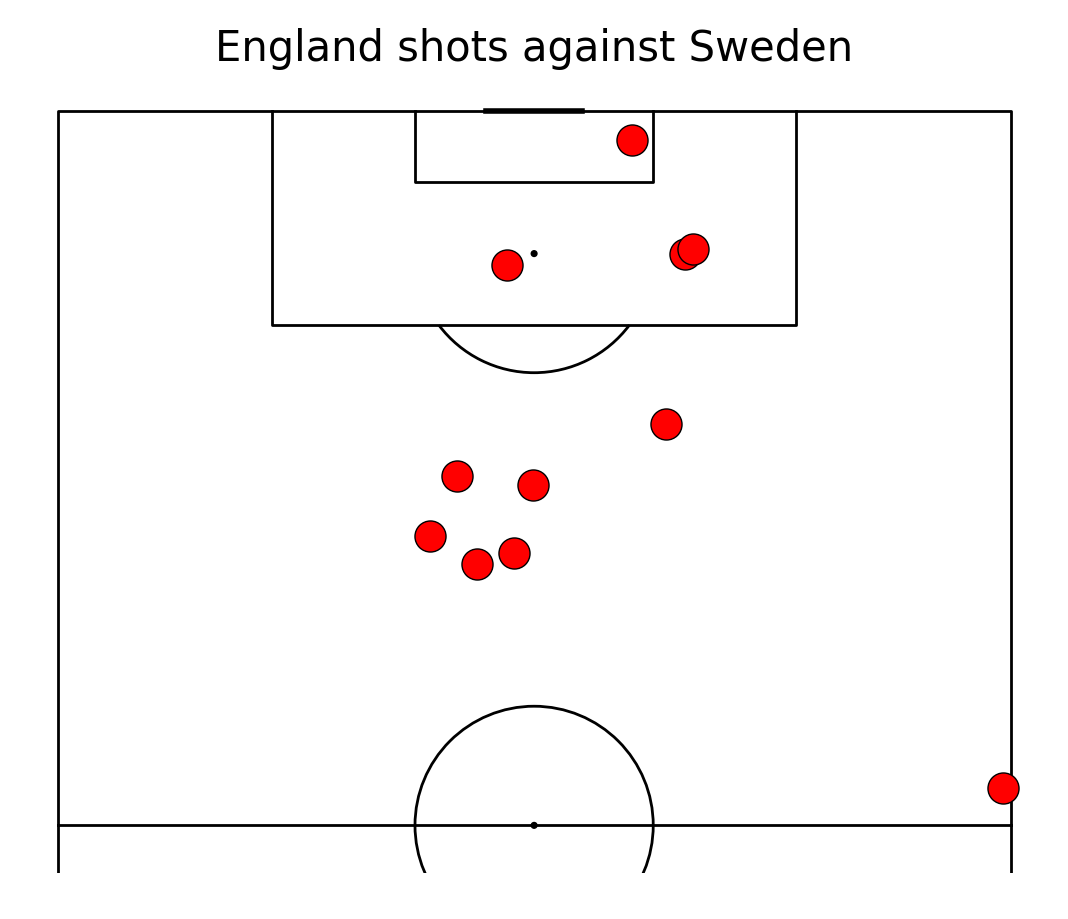

In [22]:
from mplsoccer import VerticalPitch

pitch = VerticalPitch(line_color='black', half = True)
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)

#query
mask_team1 = (df.type_name == 'Shot') & (df.team_name == team1)
#finding rows in the df and keeping only necessary columns
df_team1 = df.loc[mask_team1, ['x', 'y', 'outcome_name', "player_name"]]

#plotting all shots
pitch.scatter(df_team1.x, df_team1.y, alpha = 1, s = 500, color = "red", ax=ax['pitch'], edgecolors="black")
fig.suptitle("England shots against Sweden", fontsize = 30)
plt.show()
